# 📊 SalesInsight: Monthly Sales Dashboard using Python

### 🔍 Project Objective
To analyze and visualize monthly sales trends using a sample dataset with Python libraries like Pandas, Seaborn, and Matplotlib.

### 🧰 Tools & Libraries
- Python
- Pandas
- Seaborn
- Matplotlib
- Jupyter Notebook

### 📈 Key Features
- Cleaned and converted raw date column
- Grouped sales by month
- Created a clear monthly sales bar chart



In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("sales_data.csv")
df

,Date,Product,Region,Sales,Quantity
0,2024-02-01,Mobile,North,25000,10
1,2024-01-02,Laptop,South,55000,5
2,2024-03-03,Tablet,East,15000,8
3,2024-04-04,Headphones,West,8000,15
4,2024-05-05,Smartwatch,North,12000,6
5,2024-06-06,Laptop,East,60000,4
6,2024-07-07,Mobile,South,27000,9
7,2024-08-08,Tablet,West,14000,7


In [5]:
#convert date column to date-time format 
df['Date']=pd.to_datetime(df['Date'],errors="coerce")

#add a month column which has date of only month and year
df['Month']=df['Date'].dt.to_period('M')

#convert this month period into timestamp because seaborn not work on period object
df['Month']=df['Month'].dt.to_timestamp()

#convert sales into numeric
df['Sales']=pd.to_numeric(df['Sales'],errors="coerce")

df

,Date,Product,Region,Sales,Quantity,Month
0,2024-02-01,Mobile,North,25000,10,2024-02-01
1,2024-01-02,Laptop,South,55000,5,2024-01-01
2,2024-03-03,Tablet,East,15000,8,2024-03-01
3,2024-04-04,Headphones,West,8000,15,2024-04-01
4,2024-05-05,Smartwatch,North,12000,6,2024-05-01
5,2024-06-06,Laptop,East,60000,4,2024-06-01
6,2024-07-07,Mobile,South,27000,9,2024-07-01
7,2024-08-08,Tablet,West,14000,7,2024-08-01


In [6]:
#clean the data
df.isnull().sum()
df.dropna()

,Date,Product,Region,Sales,Quantity,Month
0,2024-02-01,Mobile,North,25000,10,2024-02-01
1,2024-01-02,Laptop,South,55000,5,2024-01-01
2,2024-03-03,Tablet,East,15000,8,2024-03-01
3,2024-04-04,Headphones,West,8000,15,2024-04-01
4,2024-05-05,Smartwatch,North,12000,6,2024-05-01
5,2024-06-06,Laptop,East,60000,4,2024-06-01
6,2024-07-07,Mobile,South,27000,9,2024-07-01
7,2024-08-08,Tablet,West,14000,7,2024-08-01


In [7]:
#with the help of groupy perform monthly sum of the product.
monthly_sales=df.groupby('Month')['Sales'].sum().reset_index()
monthly_sales

,Month,Sales
0,2024-01-01,55000
1,2024-02-01,25000
2,2024-03-01,15000
3,2024-04-01,8000
4,2024-05-01,12000
5,2024-06-01,60000
6,2024-07-01,27000
7,2024-08-01,14000


In [8]:
max_sales = monthly_sales['Sales'].max()
monthly_sales['Highlight']= ['Max' if sale == max_sales else 'Normal' for sale in monthly_sales['Sales']]

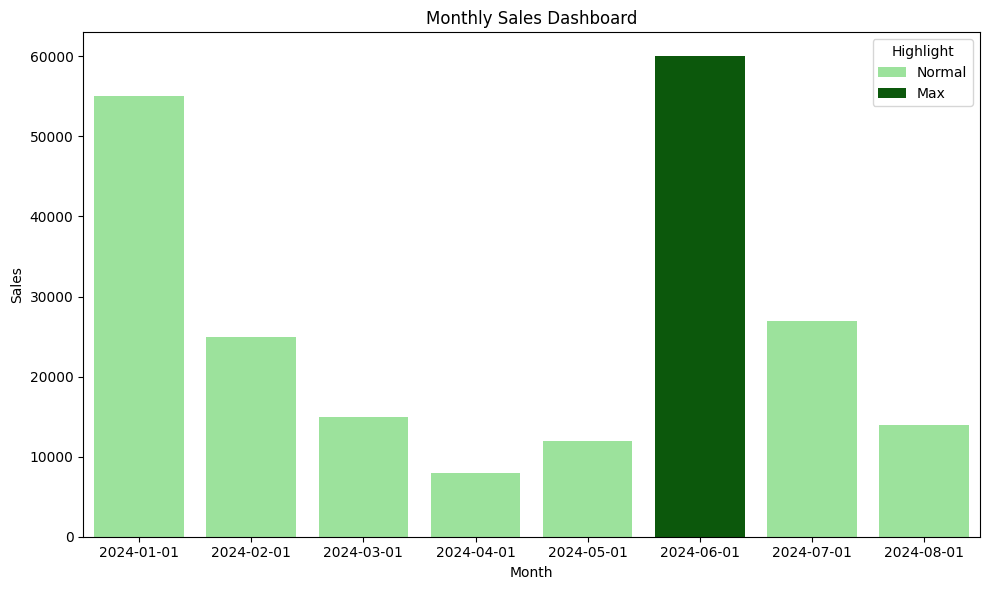

In [9]:
plt.figure(figsize=(10,6))
sns.barplot(x="Month",y="Sales",data=monthly_sales,hue='Highlight',palette={'Normal':'lightgreen','Max':'darkgreen'})
plt.title("Monthly Sales Dashboard")
plt.tight_layout()
plt.show()



### ✅ Summary

* Processed monthly sales data
* Visualized sales trends with bar chart
* Highlighted highest sales month
* Added trendline for clear insight

> 📌 **Insight**: June had the highest sales.

